In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr
import xlwings as xw

In [16]:
caminho_mensal_gare = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE"
df_fundos_corretoras = pd.read_excel(f"{caminho_mensal_gare}\\Corretoras_Fundos_-_Novembro.xlsx")
dfMENSAL = pd.read_excel(f"{caminho_mensal_gare}\\BASE_MENSAL_GARE_NOV.xlsx")
dfMENSAL = dfMENSAL.rename(columns={'CATEGORIAS ATUAIS':'CATEGORIAS_ATUAIS', 'CATEGORIAS ANTIGAS':'CATEGORIAS_ANTIGAS'})
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                      'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                    'CATEGORIAS':'first'})

dfMENSAL_final = dfMENSAL.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

o valor de compra é 108482375.8 e o valor de venda é 108482375.8, e o total é 216964751.6


In [17]:
def graf_barras_zeragens(
    df,
    filename,
    color='#3B5279',
    figsize=(8, 4),
    width=0.8,
    fontsize_y=2,
    fontsize_label=9,
    font=Avenir
):

    fig, ax = plt.subplots(figsize=figsize)

    sb.barplot(
        data=df,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        ax=ax,
        color=color,
        dodge=True,
        width=width
    )

    ylabels = df['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font)

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label,
                fontproperties=font
            )

    # Ajustar as bordas
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename, transparent=True, dpi=300, bbox_inches='tight')
    


def graf_compra_e_venda(
        df_cv,
        filename_cv,
        palette_cv={'Venda': '#767070', 'Compra': '#3B5279'},
        figsize_cv=(8, 4),
        width_cv=0.8,
        fontsize_y=2,
        fontsize_label_cv=9,
        font_cv=Avenir
):
    fig, ax = plt.subplots(figsize=figsize_cv)

    sb.barplot(
        data=df_cv,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        hue='OPERAÇÃO',
        ax=ax,
        palette=palette_cv,
        dodge=True,
        width=width_cv
    )

    # usa o DataFrame certo
    ylabels = df_cv['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font_cv)

    for p in ax.patches:
        # Obtém a largura (valor de x) e a posição do centro da barra
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        # Adiciona rótulos formatados com separador de milhares
        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label_cv,
                fontproperties=font_cv
            )

    # Ajustar os spines (bordas)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')

import matplotlib.pyplot as plt
import os

def plotar_grafico_horizontal_empilhado(df, filename_cv):
    # Define paleta de cores
    cores = {
        'VENDA': '#767070',
        'COMPRA': '#3B5279',
        'ZERAGENS': '#AFABAB'
    }

    categorias = df['CATEGORIAS_ANTIGAS']
    vendas = df['VENDA']
    compras = df['COMPRA']
    zeragens = df['ZERAGENS']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars1 = ax.barh(categorias, vendas, color=cores['VENDA'])
    bars2 = ax.barh(categorias, compras, left=vendas, color=cores['COMPRA'])
    bars3 = ax.barh(categorias, zeragens, left=vendas + compras, color=cores['ZERAGENS'])

    for i in range(len(categorias)):
        ax.text(vendas[i] / 2, i, f'{int(vendas[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] / 2, i, f'{int(compras[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='white')
        ax.text(vendas[i] + compras[i] + zeragens[i] / 2, i, f'{int(zeragens[i]):,}'.replace(',', '.'), ha='center', va='center', fontsize=8, color='black')

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(True)
    for spine_name, spine in ax.spines.items():
        spine.set_visible(spine_name == 'left')

    plt.tight_layout()
    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')



In [18]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 100.0 e o total de venda é 100.0


In [19]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,13448314.43,Compra PF,12.40,0-1k
1,1,Compra,PJ,22092.99,Compra PJ,0.02,0-1k
2,2,Compra,PF,17187888.31,Compra PF,15.84,1k-5k
3,2,Compra,PJ,19535.21,Compra PJ,0.02,1k-5k
4,3,Compra,PF,18328139.01,Compra PF,16.90,5k-20k
5,3,Compra,PJ,387097.18,Compra PJ,0.36,5k-20k
6,4,Compra,PF,12772226.98,Compra PF,11.77,20k-50k
7,4,Compra,PJ,1738829.00,Compra PJ,1.60,20k-50k
8,5,Compra,PF,6531498.39,Compra PF,6.02,50k-100k
9,5,Compra,PJ,13236742.73,Compra PJ,12.20,50k-100k


In [20]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-3097482.16,Venda PF,-2.86,0-1k
1,1,Venda,PJ,-6263.82,Venda PJ,-0.01,0-1k
2,2,Venda,PF,-5318367.64,Venda PF,-4.90,1k-5k
3,2,Venda,PJ,-7269.83,Venda PJ,-0.01,1k-5k
4,3,Venda,PF,-9174960.40,Venda PF,-8.46,5k-20k
5,3,Venda,PJ,-70792.71,Venda PJ,-0.07,5k-20k
6,4,Venda,PF,-7674997.18,Venda PF,-7.07,20k-50k
7,4,Venda,PJ,-241319.96,Venda PJ,-0.22,20k-50k
8,5,Venda,PF,-7061695.31,Venda PF,-6.51,50k-100k
9,5,Venda,PJ,-89900.00,Venda PJ,-0.08,50k-100k


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_11392\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

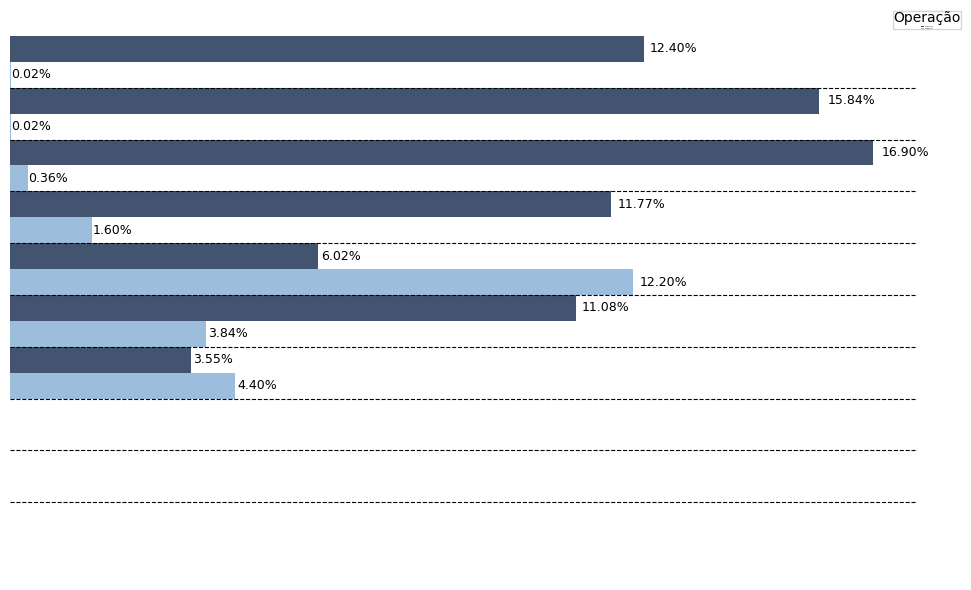

In [21]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_11392\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT P

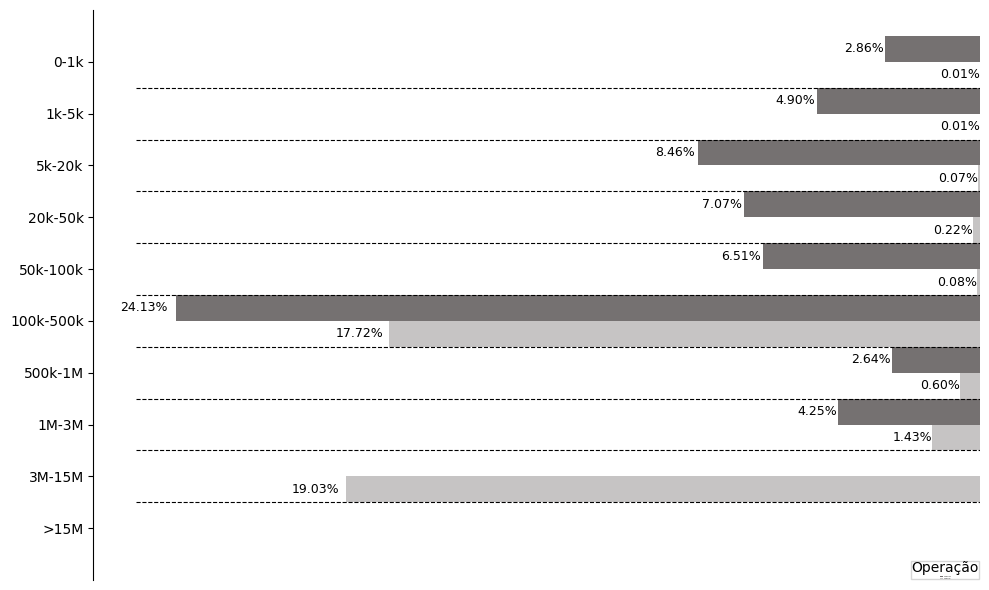

In [22]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [23]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'GARE15'
of2 = 'GALG15'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
MAUÁ CAPITAL REAL ESTATE FDO DE INV IMOB,50k-100k,PJ,9244434.24,100k-500k,AUSENTE,AUSENTE
GGR COVEPI RENDA FII,500k-1M,PJ,4776237.00,3M-15M,AUSENTE,AUSENTE
XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,3992308.49,100k-500k,AUSENTE,AUSENTE
CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO DE INVESTIMENT,100k-500k,PJ,2077959.00,1M-3M,AUSENTE,AUSENTE
OSMAR LUIZ MICHELON,1k-5k,PF,1441155.78,1M-3M,GARE15,GALG15
BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP LTDA,100k-500k,PJ,1078341.12,500k-1M,AUSENTE,AUSENTE
EUMAR MARTINELLI BRAGA,500k-1M,PF,978660.00,500k-1M,GARE15,GALG15
RICARDO RINALDI,100k-500k,PF,942309.00,1M-3M,GARE15,GALG15
LUIS CARLOS CORTES,500k-1M,PF,874098.00,500k-1M,GARE15,GALG15


In [24]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS_ATUAIS'] = TOP10_Venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

TOP10_Venda = TOP10_Venda.set_index('NOME')

TOP10_Venda

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIMENTO IMOBILIÁR,3M-15M,PJ,13386635.19,0-1k,AUSENTE,AUSENTE
MAUÁ CAPITAL REAL ESTATE FDO DE INV IMOB,100k-500k,PJ,9575746.54,0-1k,AUSENTE,AUSENTE
CSHG ARKHOS FIC DE FIM CP IE,3M-15M,PJ,4124160.00,0-1k,AUSENTE,AUSENTE
XP INVESTIMENTOS CCTVM S/A,100k-500k,PJ,3881211.77,100k-500k,AUSENTE,AUSENTE
RIO BRAVO FUNDO DE FII,3M-15M,PJ,3132810.00,100k-500k,AUSENTE,AUSENTE
EUMAR MARTINELLI BRAGA,1M-3M,PF,2520287.40,0-1k,GARE15,GALG15
CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO DE INVESTIMENT,100k-500k,PJ,1893471.24,100k-500k,AUSENTE,AUSENTE
CAPITANIA HEDGE FUND FII,1M-3M,PJ,1554685.65,0-1k,AUSENTE,AUSENTE
MARIA CLARA VILELA SOUZA RODRIGUES,1M-3M,PF,1150760.80,0-1k,GARE15,GALG15


In [25]:
cont_dfcompra = dfCOMPRA['NOME'].value_counts().reset_index()
cont_dfcompra.columns=['NOME', 'count']

acomp_PJ_compra = dfCOMPRA_final.query('PF_PJ == "PJ"')

compra_pj = acomp_PJ_compra[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

top10pj_compra = compra_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_compra['VAR_PRECO'] = top10pj_compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_compra['CATEGORIAS'] = top10pj_compra['CATEGORIAS'].map(mapear)

top10pj_compra['CATEGORIAS_ATUAIS'] = top10pj_compra['CATEGORIAS_ATUAIS'].fillna('0-1k')


top10pj_compra = top10pj_compra.set_index('NOME')

top10pj_compra_final = top10pj_compra.merge(cont_dfcompra, on="NOME",how='left')

top10pj_compra_final['count'] = top10pj_compra_final['count'].fillna(0).astype(float)

top10pj_compra_final['VAR_PRECO'] = top10pj_compra_final['VAR_PRECO'].astype(float)

top10pj_compra_final['PACE'] = top10pj_compra_final['VAR_PRECO']/top10pj_compra_final['count']

top10pj_compra_final['PACE'] = top10pj_compra_final['PACE'].round(0)

top10pj_compra_final = top10pj_compra_final.rename(columns={'count':'COMPRAS'})

top10pj_compra_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15,COMPRAS,PACE
0,MAUÁ CAPITAL REAL ESTATE FDO DE INV IMOB,50k-100k,PJ,9244434.24,100k-500k,AUSENTE,AUSENTE,8.0,1155554.0
1,GGR COVEPI RENDA FII,500k-1M,PJ,4776237.00,3M-15M,AUSENTE,AUSENTE,1.0,4776237.0
2,XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,3992308.49,100k-500k,AUSENTE,AUSENTE,10.0,399231.0
3,CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO ...,100k-500k,PJ,2077959.00,1M-3M,AUSENTE,AUSENTE,4.0,519490.0
4,BTG PACTUAL REAL ESTATE HEDGE FUND FII - RESP ...,100k-500k,PJ,1078341.12,500k-1M,AUSENTE,AUSENTE,5.0,215668.0
5,RIGEL COVE LP,20k-50k,PJ,693796.93,20k-50k,AUSENTE,AUSENTE,6.0,115633.0
6,XTX MARKETS TRADING LIMITED,20k-50k,PJ,690028.35,100k-500k,AUSENTE,AUSENTE,7.0,98575.0
7,M MUSONS PARTICIPACOES LTDA,5k-20k,PJ,340865.60,100k-500k,AUSENTE,AUSENTE,2.0,170433.0
8,FRG PTRIA VBI FUNDO DE INVESTIMENTO FINANCEIRO...,100k-500k,PJ,329311.40,100k-500k,AUSENTE,AUSENTE,1.0,329311.0
9,TIVIO SECURITIES FUNDO DE INVESTIMENTO IMOBILI...,100k-500k,PJ,304425.60,100k-500k,AUSENTE,AUSENTE,1.0,304426.0


In [26]:
cont_dfvenda = dfVENDA['NOME'].value_counts().reset_index()
cont_dfvenda.columns=['NOME', 'count']

acomp_PJ_venda = dfVENDA_final.query('PF_PJ == "PJ"')

venda_pj = acomp_PJ_venda[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

top10pj_venda = venda_pj.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

top10pj_venda['VAR_PRECO'] = top10pj_venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

top10pj_venda['CATEGORIAS'] = top10pj_venda['CATEGORIAS'].map(mapear)

top10pj_venda['CATEGORIAS_ATUAIS'] = top10pj_venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

top10pj_venda.set_index('NOME')

top10pj_venda_final = top10pj_venda.merge(cont_dfvenda, on='NOME', how='left')

top10pj_venda_final['count'] = top10pj_venda_final['count'].fillna(0).astype(float)

top10pj_venda_final['VAR_PRECO'] = top10pj_venda_final['VAR_PRECO'].fillna(0).astype(float)

top10pj_venda_final['PACE'] = (top10pj_venda_final['VAR_PRECO']/top10pj_venda_final['count']).round(0)

top10pj_venda_final = top10pj_venda_final.rename(columns={'count':'VENDAS'})

top10pj_venda_final


,NOME,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15,VENDAS,PACE
0,OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIM...,3M-15M,PJ,13386635.19,0-1k,AUSENTE,AUSENTE,14.0,956188.0
1,MAUÁ CAPITAL REAL ESTATE FDO DE INV IMOB,100k-500k,PJ,9575746.54,0-1k,AUSENTE,AUSENTE,6.0,1595958.0
2,CSHG ARKHOS FIC DE FIM CP IE,3M-15M,PJ,4124160.00,0-1k,AUSENTE,AUSENTE,1.0,4124160.0
3,XP INVESTIMENTOS CCTVM S/A,100k-500k,PJ,3881211.77,100k-500k,AUSENTE,AUSENTE,9.0,431246.0
4,RIO BRAVO FUNDO DE FII,3M-15M,PJ,3132810.00,100k-500k,AUSENTE,AUSENTE,10.0,313281.0
5,CAPITANIA PREV ADVISORY XP SEGUROS FIFE FUNDO ...,100k-500k,PJ,1893471.24,100k-500k,AUSENTE,AUSENTE,2.0,946736.0
6,CAPITANIA HEDGE FUND FII,1M-3M,PJ,1554685.65,0-1k,AUSENTE,AUSENTE,1.0,1554686.0
7,RIGEL COVE LP,100k-500k,PJ,915991.32,0-1k,AUSENTE,AUSENTE,7.0,130856.0
8,CSHG ARKHOS FIA IE,500k-1M,PJ,652077.00,0-1k,AUSENTE,AUSENTE,1.0,652077.0
9,XTX MARKETS TRADING LIMITED,100k-500k,PJ,629668.04,20k-50k,AUSENTE,AUSENTE,9.0,69963.0


# CATEGORIAS QUE MAIS COMPRARAM E VENDERAM

In [27]:
mapa = {'0-1k':1, '1k-5k':2, '5k-20k':3, '20k-50k':4, '50k-100k':5, '100k-500k':6, '500k-1M':7, '1M-3M':8, '3M-15M':9, '>15M':10}

CGCV_df = dfMENSAL.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

CGCV_df['CATEGORIAS_NUMERICAS'] = CGCV_df['CATEGORIAS_ANTIGAS'].map(mapa)
CGCV_df = CGCV_df.sort_values(['CATEGORIAS_NUMERICAS', 'OPERAÇÃO'], ascending=[True, False])

CGCV_sorted = CGCV_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

CGCV_sorted = (CGCV_sorted['VAR_PRECO']/1000).round(0)

CGCV_dataf = pd.DataFrame(CGCV_sorted)

CGCV_dataf = CGCV_dataf.reset_index()

CGCV_dataf

,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,1,0-1k,Venda,3101.0
1,1,0-1k,Compra,12635.0
2,2,1k-5k,Venda,5301.0
3,2,1k-5k,Compra,17107.0
4,3,5k-20k,Venda,9478.0
5,3,5k-20k,Compra,19585.0
6,4,20k-50k,Venda,8190.0
7,4,20k-50k,Compra,13773.0
8,5,50k-100k,Venda,7207.0
9,5,50k-100k,Compra,7446.0


In [28]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,13295
1,2,1k-5k,1964
2,3,5k-20k,722
3,4,20k-50k,182
4,5,50k-100k,73
5,6,100k-500k,112
6,7,500k-1M,3
7,8,1M-3M,3
8,9,3M-15M,2
9,10,>15M,1


In [29]:
# Mapa de ordenação
mapa = {
    '0-1k': 1, '1k-5k': 2, '5k-20k': 3, '20k-50k': 4,
    '50k-100k': 5, '100k-500k': 6, '500k-1M': 7,
    '1M-3M': 8, '3M-15M': 9, '>15M': 10
}

# Agrupa e soma por categoria e operação
CGCV_df = dfMENSAL_final.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

# Pivotando para ter colunas separadas de Compra e Venda
CGCV_pivot = CGCV_df.pivot(index='CATEGORIAS_ANTIGAS', columns='OPERAÇÃO', values='VAR_PRECO').fillna(0)

# Renomeia colunas para o formato desejado
CGCV_pivot = CGCV_pivot.rename(columns={'Venda': 'VENDA', 'Compra': 'COMPRA'})

# Cria coluna com valores de zeragens
zeragens = dfZERADOS.groupby('CATEGORIAS_ANTIGAS')['VAR_PRECO'].sum().reindex(CGCV_pivot.index).fillna(0)

# Adiciona coluna de zeragens ao DataFrame
CGCV_pivot['ZERAGENS'] = zeragens

# Reseta índice e mapeia ordem
CGCV_pivot = CGCV_pivot.reset_index()
CGCV_pivot['CATEGORIAS_NUMERICAS'] = CGCV_pivot['CATEGORIAS_ANTIGAS'].map(mapa)

# Ordena pela categoria numérica
CGCV_pivot = CGCV_pivot.sort_values('CATEGORIAS_NUMERICAS').drop(columns='CATEGORIAS_NUMERICAS')
CGCV_pivot['COMPRA'] = (CGCV_pivot['COMPRA']/1000).round(0)
CGCV_pivot['VENDA'] = (CGCV_pivot['VENDA']/1000).round(0)
CGCV_pivot['ZERAGENS'] = (CGCV_pivot['ZERAGENS']/1000).round(0)
CGCV_pivot = CGCV_pivot

# Resultado final
CGCV_pivot_df = pd.DataFrame(CGCV_pivot)
CGCV_pivot_df = CGCV_pivot_df.set_index(['CATEGORIAS_ANTIGAS', 'COMPRA', 'VENDA', 'ZERAGENS'])
CGCV_pivot_df = CGCV_pivot_df.reset_index()
CGCV_pivot_df


OPERAÇÃO,CATEGORIAS_ANTIGAS,COMPRA,VENDA,ZERAGENS
0,0-1k,14424.0,2630.0,2665.0
1,1k-5k,17863.0,4585.0,4294.0
2,5k-20k,19448.0,8307.0,7347.0
3,20k-50k,13618.0,7095.0,5869.0
4,50k-100k,15543.0,6488.0,5498.0
5,100k-500k,21227.0,48445.0,33877.0
6,500k-1M,9140.0,1304.0,2254.0
7,1M-3M,0.0,6204.0,5226.0
8,3M-15M,0.0,20644.0,17511.0
9,>15M,0.0,0.0,0.0


# CATEGORIAS QUE MAIS ZERARAM

In [30]:
def zeragem(ca):
    if ca == 0:
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['FINANCEIRO_NOVO'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')


CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.reset_index()
CMZ_cotistas['CATEGORIAS_NUMERICAS'] = CMZ_cotistas['CATEGORIAS_ANTIGAS'].map(mapa)
CMZ_cotistas = CMZ_cotistas.sort_values(['CATEGORIAS_NUMERICAS'], ascending=[True])



CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.set_index(['CATEGORIAS_NUMERICAS','CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,13295
1,2,1k-5k,1964
2,3,5k-20k,722
3,4,20k-50k,182
4,5,50k-100k,73
5,6,100k-500k,112
6,7,500k-1M,3
7,8,1M-3M,3
8,9,3M-15M,2
9,10,>15M,1


# DATA DE MAIORES ZERAGENS EM VOL FINANCEIRO

# ACOMPANHAMENTO COTISTAS COM TAG GARE15 E GALG15

In [31]:
# Mapa de ordenação
mapa = {
    '0-1k': 1, '1k-5k': 2, '5k-20k': 3, '20k-50k': 4,
    '50k-100k': 5, '100k-500k': 6, '500k-1M': 7,
    '1M-3M': 8, '3M-15M': 9, '>15M': 10
}

dfGARE15 = dfMENSAL_final.query('GARE15 == "GARE15"')
dfVENDA_GARE15 = dfVENDA_final.query('GARE15 == "GARE15"')
dfVENDA_GARE15
dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')


# Agrupa e soma por categoria e operação
CGCV_GARE15_df = dfGARE15.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum().reset_index()

# Pivotando para ter colunas separadas de Compra e Venda
CGCV_GARE15_pivot = CGCV_GARE15_df.pivot(index='CATEGORIAS_ANTIGAS', columns='OPERAÇÃO', values='VAR_PRECO').fillna(0)

# Renomeia colunas para o formato desejado
CGCV_GARE15_pivot = CGCV_GARE15_pivot.rename(columns={'Venda': 'VENDA', 'Compra': 'COMPRA'})

# Cria coluna com valores de zeragens
zeragens_gare15 = dfZERAGEM_GARE15.groupby('CATEGORIAS_ANTIGAS')['VAR_PRECO'].sum().reindex(CGCV_GARE15_pivot.index).fillna(0)

# Adiciona coluna de zeragens ao DataFrame
CGCV_GARE15_pivot['ZERAGENS'] = zeragens_gare15

# Reseta índice e mapeia ordem
CGCV_GARE15_pivot = CGCV_GARE15_pivot.reset_index()
CGCV_GARE15_pivot['CATEGORIAS_NUMERICAS'] = CGCV_GARE15_pivot['CATEGORIAS_ANTIGAS'].map(mapa)

# Ordena pela categoria numérica
CGCV_GARE15_pivot = CGCV_GARE15_pivot.sort_values('CATEGORIAS_NUMERICAS').drop(columns='CATEGORIAS_NUMERICAS')
CGCV_GARE15_pivot['COMPRA'] = (CGCV_GARE15_pivot['COMPRA']/1000).round(0)
CGCV_GARE15_pivot['VENDA'] = (CGCV_GARE15_pivot['VENDA']/1000).round(0)
CGCV_GARE15_pivot['ZERAGENS'] = (CGCV_GARE15_pivot['ZERAGENS']/1000).round(0)
CGCV_GARE15_pivot = CGCV_GARE15_pivot

# Resultado final
CGCV_GARE15_pivot_df = pd.DataFrame(CGCV_GARE15_pivot)
CGCV_GARE15_pivot_df = CGCV_GARE15_pivot_df.set_index(['CATEGORIAS_ANTIGAS', 'COMPRA', 'VENDA', 'ZERAGENS'])
CGCV_GARE15_pivot_df = CGCV_GARE15_pivot_df.reset_index()
CGCV_GARE15_pivot_df

OPERAÇÃO,CATEGORIAS_ANTIGAS,COMPRA,VENDA,ZERAGENS
0,0-1k,519.0,0.0,0.0
1,1k-5k,1464.0,37.0,32.0
2,5k-20k,54.0,1149.0,1005.0
3,20k-50k,89.0,2144.0,1590.0
4,50k-100k,908.0,1406.0,1105.0
5,100k-500k,4078.0,7555.0,6665.0
6,500k-1M,1839.0,0.0,875.0
7,1M-3M,0.0,4650.0,3671.0


In [32]:
dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')
G15_ZERADOS = dfZERAGEM_GARE15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
G15_ZERADOS.sort_values(ascending=False)

zero_GARE15_qtde = pd.DataFrame(G15_ZERADOS)
zero_GARE15_qtde = zero_GARE15_qtde.sort_values(['VAR_PRECO'], ascending=False)
zero_GARE15_qtde = zero_GARE15_qtde.reset_index()
zero_GARE15_qtde['CATEGORIAS_NUMERICAS'] = zero_GARE15_qtde['CATEGORIAS_ANTIGAS'].map(mapa)
zero_GARE15_qtde = zero_GARE15_qtde.sort_values(['CATEGORIAS_NUMERICAS'], ascending=True)
zero_GARE15_qtde = zero_GARE15_qtde.set_index(['CATEGORIAS_NUMERICAS', 'CATEGORIAS_ANTIGAS', 'VAR_PRECO'])
zero_GARE15_qtde = zero_GARE15_qtde.reset_index()
zero_GARE15_qtde

,CATEGORIAS_NUMERICAS,CATEGORIAS_ANTIGAS,VAR_PRECO
0,1,0-1k,3
1,2,1k-5k,10
2,3,5k-20k,86
3,4,20k-50k,52
4,5,50k-100k,17
5,6,100k-500k,33
6,7,500k-1M,1
7,8,1M-3M,2


findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

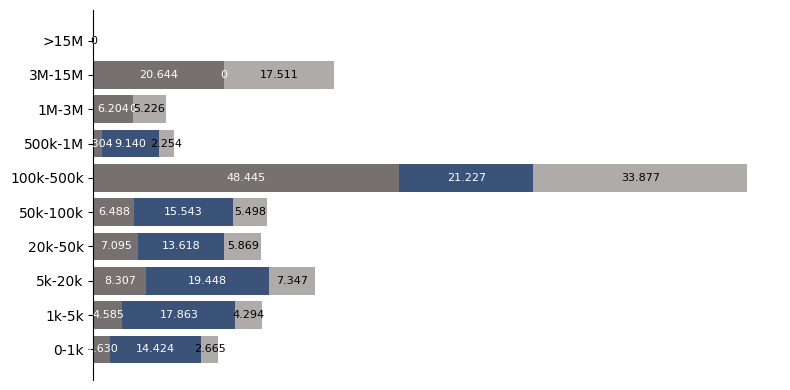

In [33]:
plotar_grafico_horizontal_empilhado(df = CGCV_pivot_df, 
                                    filename_cv='grafico_horizontal.png')

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

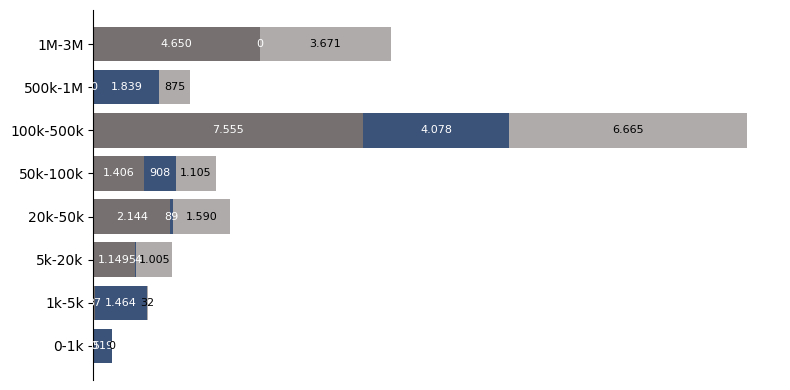

In [34]:
plotar_grafico_horizontal_empilhado(df = CGCV_GARE15_pivot_df, 
                                    filename_cv='grafico_horizontal_GARE15.png')

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

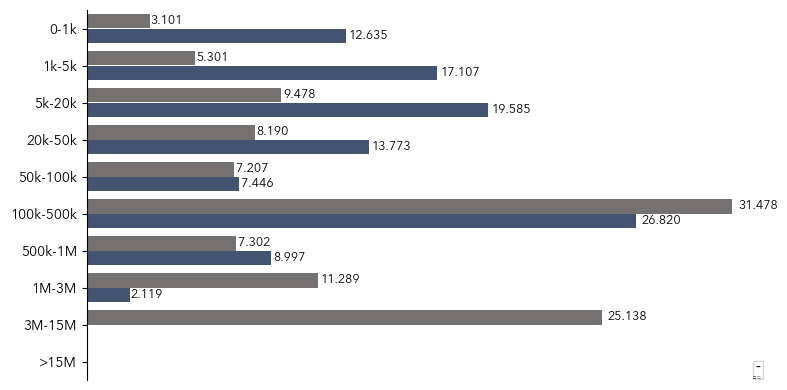

In [35]:
graf_compra_e_venda(
    df_cv=CGCV_dataf,
    filename_cv='CATEGORIAS_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_11392\2271029386.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

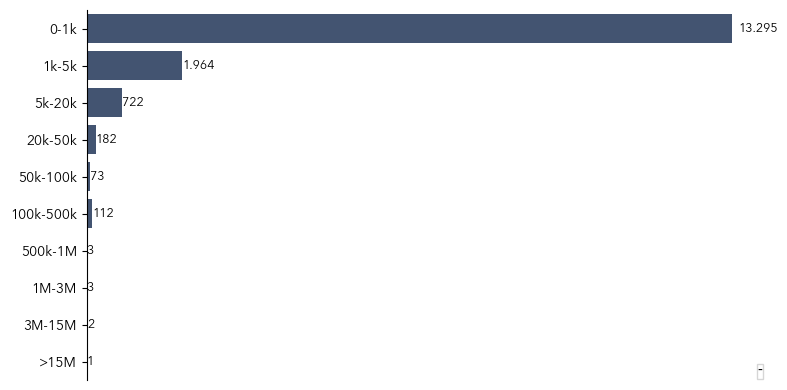

In [36]:
graf_barras_zeragens(
    df=CMZ_cotistas_df,
    filename='CATEGORIAS_zeragem_cotistas.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_11392\2271029386.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

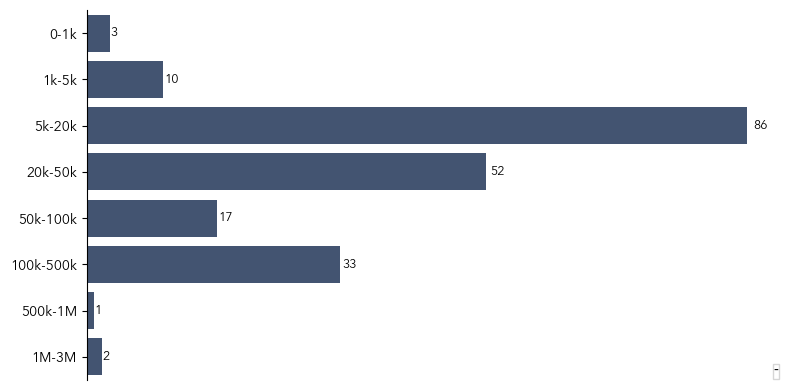

In [37]:
graf_barras_zeragens(
    df=zero_GARE15_qtde,
    filename='Zeragens_GARE15_Qtde_Cat.png',
    color='#3B5279'
)

In [38]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho PPT e Imagens
c_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATORIO\RELATORIO_PASSIVO_MENSAL.Vteste.pptx"
img_compra = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ.png"
img_venda = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ.png"
c_img_CAT_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal.png"
c_zer_img_qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_zeragem_cotistas.png"
c_img_CAT_GARE15_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\grafico_horizontal_GARE15.png"
c_img_zer_GARE15_Qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GARE15_Qtde_Cat.png"

#Abre a apresentação
prs=Presentation(c_ppt)

#Selecionando os slides e definindo a posição das imagens

slide1 = prs.slides[0]
slide2 = prs.slides[1]

#Imagem Compra
leftC = Cm(10.28)
topC = Cm(19.85)
widthC = Cm(7.53)
heightC = Cm(5.47)

#Imagem Venda
leftV = Cm(2.74)
topV = Cm(19.85)
widthV = Cm(7.68)
heightV = Cm(5.48)

#Imagem Categorias CxV
leftCxV = Cm(0.19)
topCxV = Cm(12.66)
widthCxV = Cm(9.71)
heightCxV = Cm(4.79)

#Imagem Categorias Zeragem Qtde
leftZ_qtde = Cm(11.08)
topZ_qtde = Cm(12.74)
widthZ_qtde = Cm(9.48)
heightZ_qtde = Cm(4.7)

#Imagem Compra e Venda - GARE15
leftCxV_GARE15 = Cm(0.15)
topCxV_GARE15 = Cm(17.95)
widthCxV_GARE15 = Cm(9.81)
heightCxV_GARE15 = Cm(4.84)

#Imagem Categorias Zeragem Qtde - GARE15
leftZ_qtde_GARE15 = Cm(11.12)
topZ_qtde_GARE15 = Cm(18.07)
widthZ_qtde_GARE15 = Cm(9.51)
heightZ_qtde_GARE15 = Cm(4.7)

#Adicionando as imagens aos slides

## Slide 1
slide1.shapes.add_picture(img_compra, leftC, topC, width=widthC, height=heightC)
slide1.shapes.add_picture(img_venda, leftV, topV, width=widthV, height=heightV)
## Slide2
slide2.shapes.add_picture(c_img_CAT_MCV, leftCxV, topCxV, width=widthCxV, height=heightCxV)
slide2.shapes.add_picture(c_zer_img_qtde, leftZ_qtde, topZ_qtde, width=widthZ_qtde, height=heightZ_qtde)
slide2.shapes.add_picture(c_img_CAT_GARE15_MCV, leftCxV_GARE15, topCxV_GARE15, width=widthCxV_GARE15, height=heightCxV_GARE15)
slide2.shapes.add_picture(c_img_zer_GARE15_Qtde, leftZ_qtde_GARE15, topZ_qtde_GARE15, width=widthZ_qtde_GARE15, height=heightZ_qtde_GARE15)

#Salvando a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATORIO\RELATORIO_PASSIVO_MENSAL.Vfinal.pptx")


# ANALISE DO COMPORTAMENTO DAS CORRETORAS EM OUTROS FUNDOS

In [39]:
#Criando o dataframe de top10 corretoras para criar as tabelas
df_fundos_corretoras_vendas = df_fundos_corretoras.drop(columns=['Mês', 'Fundo', 'Compras - Vtt'])
#Somando o volume de vendas das corretoras
df_fundos_corretoras_vendas = df_fundos_corretoras_vendas.groupby(['Corretora'])['Vendas -Vtt'].sum()
#Transformando o resultado da linha acima em dataframe
corretoras_vendas = pd.DataFrame(df_fundos_corretoras_vendas)
#Organizando o dataframe 'corretoras_vendas' do maior para o menor, pegando os 10 maiores 
top10_corretoras_vendas = corretoras_vendas.sort_values(by = ['Vendas -Vtt'], ascending=False).iloc[:10, :]
#resetando o index
top10_corretoras_vendas = top10_corretoras_vendas.reset_index()
#pegando apenas a coluna de corretoras do df anterior
top10_corretoras = top10_corretoras_vendas['Corretora']
#No df principal com todas as corretoras e fundos e volumes e selecionando apenas as corretoras do top10
df_fundos_corretoras_top = df_fundos_corretoras[df_fundos_corretoras['Corretora'].isin(top10_corretoras)].copy()
#criando uma tabela com o vol de compra apenas das corretoras do top10 e dos fundos
tabela_compras = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                       columns='Corretora',
                                                       values='Compras - Vtt',
                                                       aggfunc='sum',
                                                       fill_value=0))
#criando uma tabela com o vol de venda apenas das corretoras do top10 e dos fundos
tabela_vendas = (df_fundos_corretoras_top.pivot_table(index='Fundo',
                                                      columns = 'Corretora',
                                                      values = 'Vendas -Vtt',
                                                      aggfunc='sum',
                                                      fill_value=0))

#resetando os indices para seguir o padrão do top10 corretoras
tabela_compras = tabela_compras.reindex(columns=top10_corretoras)
tabela_vendas = tabela_vendas.reindex(columns=top10_corretoras)
#ajustando os volumes
tabela_compras[top10_corretoras] = (tabela_compras[top10_corretoras]/1000).round(0)
tabela_vendas[top10_corretoras] = (tabela_vendas[top10_corretoras]/1000).round(0)
#criando uma tabela de saldo final diminuindo o valor de compra pelo valor de venda
tabela_saldo = tabela_compras[top10_corretoras] - tabela_vendas[top10_corretoras]
tabela_saldo = tabela_saldo.reset_index()

In [40]:
tabela_compras

Corretora,XP,GENIAL,BTG PACTUAL,ITAU,UBS,INTER,NU INVEST,AGORA,IDEAL,SAFRA
Fundo,,,,,,,,,,
ALZR11,9878.0,7929.0,4493.0,2435.0,1932.0,1953.0,2439.0,520.0,1037.0,250.0
BTLG11,56085.0,35203.0,25678.0,13177.0,10265.0,6425.0,8318.0,5748.0,4461.0,683.0
GARE11,28105.0,39367.0,10599.0,6113.0,2256.0,9961.0,12284.0,5886.0,972.0,340.0
HGLG11,44149.0,37382.0,13690.0,9315.0,11004.0,8885.0,14392.0,3688.0,2154.0,290.0
HGRU11,27283.0,13996.0,10062.0,7069.0,3909.0,3518.0,3469.0,1531.0,1879.0,667.0
KNRI11,28734.0,24780.0,10685.0,12111.0,8006.0,3873.0,6191.0,3027.0,4357.0,343.0
TRXF11,45925.0,42141.0,23444.0,8935.0,13270.0,7685.0,7255.0,4808.0,2730.0,4062.0


In [41]:
tabela_vendas

Corretora,XP,GENIAL,BTG PACTUAL,ITAU,UBS,INTER,NU INVEST,AGORA,IDEAL,SAFRA
Fundo,,,,,,,,,,
ALZR11,11888.0,7826.0,4874.0,1606.0,1998.0,1402.0,1276.0,507.0,1047.0,788.0
BTLG11,51068.0,32029.0,48045.0,8015.0,12194.0,2779.0,3206.0,3408.0,3509.0,2318.0
GARE11,50111.0,36369.0,6426.0,2519.0,3778.0,5810.0,4428.0,5647.0,876.0,213.0
HGLG11,55658.0,35966.0,12754.0,9261.0,12517.0,4797.0,6636.0,5162.0,2692.0,2385.0
HGRU11,39298.0,13193.0,5797.0,4705.0,4194.0,1343.0,1050.0,1216.0,1469.0,1354.0
KNRI11,23991.0,23308.0,6957.0,25324.0,8039.0,2179.0,2954.0,1315.0,5921.0,2049.0
TRXF11,61455.0,36916.0,16209.0,11829.0,15685.0,3587.0,1687.0,2302.0,2856.0,2027.0


In [42]:

tabela_saldo

Corretora,Fundo,XP,GENIAL,BTG PACTUAL,ITAU,UBS,INTER,NU INVEST,AGORA,IDEAL,SAFRA
0,ALZR11,-2010.0,103.0,-381.0,829.0,-66.0,551.0,1163.0,13.0,-10.0,-538.0
1,BTLG11,5017.0,3174.0,-22367.0,5162.0,-1929.0,3646.0,5112.0,2340.0,952.0,-1635.0
2,GARE11,-22006.0,2998.0,4173.0,3594.0,-1522.0,4151.0,7856.0,239.0,96.0,127.0
3,HGLG11,-11509.0,1416.0,936.0,54.0,-1513.0,4088.0,7756.0,-1474.0,-538.0,-2095.0
4,HGRU11,-12015.0,803.0,4265.0,2364.0,-285.0,2175.0,2419.0,315.0,410.0,-687.0
5,KNRI11,4743.0,1472.0,3728.0,-13213.0,-33.0,1694.0,3237.0,1712.0,-1564.0,-1706.0
6,TRXF11,-15530.0,5225.0,7235.0,-2894.0,-2415.0,4098.0,5568.0,2506.0,-126.0,2035.0


In [43]:
# Caminhos
caminho_arquivo = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_BASE\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5.xlsm"
caminho_destino = r"C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5_MACRO.xlsm"

# DataFrames e locais onde serão colados
dfs_cola = [
    (TOP10_Venda, 'DADOS2', 'N4'),
    (TOP10_Compra, 'DADOS2', 'N19'),
    (top10pj_compra_final, 'DADOS2', 'M36'),
    (top10pj_venda_final, 'DADOS2', 'M51'),
    (tabela_compras, 'COMP_PASSIVOS', 'D15'),
    (tabela_vendas, 'COMP_PASSIVOS', 'D27'),
    (tabela_saldo, 'COMP_PASSIVOS', 'C39')
]

# Abrir Excel
app = None
wb = None

try:
    app = xw.App(visible=False)
    wb = app.books.open(caminho_arquivo)

    for df, aba, celula in dfs_cola:
        try:
            ws = wb.sheets[aba]
            ws.range(celula).value = df
        except Exception as e:
            print(f"❌ Erro ao colar na aba '{aba}' na célula {celula}: {e}")

    wb.save(caminho_destino)
    print(f"✅ Arquivo salvo com sucesso em: {caminho_destino}")

except Exception as e:
    print(f"❌ Erro geral ao processar o arquivo: {e}")

finally:
    if wb:
        wb.close()
    if app:
        app.quit()


✅ Arquivo salvo com sucesso em: C:\Users\LucasCavalcante\Documents\FORMATAR_PASSIVO_MENSAL_MACRO\BASE_RELATORIO_PASSIVO_MENSAL_GARE.V5_MACRO.xlsm


In [44]:
#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
pasta_destino = r'C:\Users\LucasCavalcante\Desktop\old'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
caminho_arquivo_excel = os.path.join(pasta_destino, 'mensal_teste.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
dfMENSAL_final.to_excel(caminho_arquivo_excel, index=False)

#print('Arquivo salvo com sucesso')